In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from rayopt import (system_from_text, Analysis, GeometricTrace,
                    FiniteConjugate, ParaxialTrace, system_from_yaml,
                    system_to_yaml, material)
np.set_printoptions(precision=5)

Populating the interactive namespace from numpy and matplotlib


System: NA=0.85 yi=13.8mm, λ=193nm (ArF) JP-2004-252119(A)
Scale: 1.0 mm
Wavelengths: 193 nm
Fields: 0, 0.7, 1
Object:
 Radius: 55.2
 Pupil:
   Pupil Distance: 2423.12
   Telecentric: True
   NA: 0.2125
Image:
 Radius: 0
 Update Radius: True
 Pupil:
   Pupil Distance: 2758.92
   Update Radius: True
   Radius: -2426.48
Stop: 35
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf      110.4      basic/vacuum   1.000   1.000     inf
 1 S      55.22        inf      131.9                 -   1.560   1.560     inf
 2 S         22      217.8     137.39      basic/vacuum   1.000   1.000     inf
 3 S      41.37     -110.2     168.12                 -   1.560   1.560     inf
 4 S     28.396     -534.6      197.2      basic/vacuum   1.000   1.000     inf
 5 S          1      -1154     198.59                 -   1.560   1.560     inf
 6 S     36.205     -245.1      233.1      basic/vacuum   1.000   1.000     inf
 7 S          1      

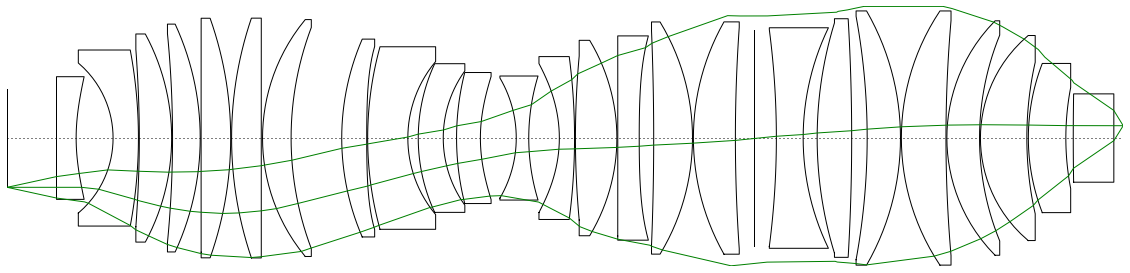

In [4]:
#http://www23.ipdl.inpit.go.jp/PDF/display/JPA_2004252119.pdf?id=3157&N0005=Gi2hcLBJttACDHWHBtdb&N0000=2010

data = """
0	0	55.220116	vacuum
1	0	22	1.560326
2	217.81507	41.369924	vacuum
3	-110.20051	28.395633	1.560326
4	-534.64554	1	vacuum
5	-1154.39307	36.204587	1.560326
6	-245.0683	1	vacuum
7	-1205.19394	31.003215	1.560326
8	-304.03524	1	vacuum
9	178223	33.134122	1.560326
10	-401.85185	1	vacuum
11	417.31243	33.242793	1.560326
12	367146	1.408409	vacuum
13	207.84791	32.000971	1.560326
14	350.13557	56.711517	vacuum
15	278.75361	28	1.560326
16	1904.04591	1.044627	vacuum
17	384.97401	45	1.560326
18	133.57481	11.656644	vacuum
19	197.26967	28	1.560326
20	128.99066	14.928217	vacuum
21	298.51649	26.680522	1.560326
22	176.6658	40.173261	vacuum
23	-132.85744	14	1.560326
24	237.43968	34.261836	vacuum
25	-151.41779	17.028254	1.560326
26	-701.12574	1.001519	vacuum
27	1005.39892	46.42613	1.560326
28	-211.68827	1	vacuum
29	-198734.9274	24	1.560326
30	1671.38643	16.227509	vacuum
31	-2955.04842	43.469645	1.560326
32	-250.70248	1	vacuum
33	264.25831	47.031538	1.560326
34	1783.1703	20.61046	vacuum
35	0	25.289518	vacuum
36	-937.67133	30	1.560326
37	283.72819	15.677718	vacuum
38	438.86854	38.67981	1.560326
39	-2259.35066	17.354437	vacuum
40	-754.04899	37.299609	1.560326
41	-285.86973	1	vacuum
42	256.17897	49.953643	1.560326
43	1532.85523	1	vacuum
44	186.621	36.602206	1.560326
45	305.34179	1	vacuum
46	149.991	51.987691	1.560326
47	399.2913	1.677104	vacuum
48	231.30867	42.004997	1.501455
49	299.00944	8.301104	vacuum
50	2955.5	45.45	1.501455
51	0	10.491218	vacuum
52	0	0	vacuum
"""

columns = "num roc distance material"
s = system_from_text(data, columns.split(),
        shifts={"distance": 1}, wavelengths=[193.306e-9],
        description="NA=0.85 yi=13.8mm, λ=193nm (ArF) JP-2004-252119(A)",
        object=FiniteConjugate(radius=13.8*4, pupil=dict(
        type="na", na=.85/4, telecentric=True, aim=False)))
s[2].aspherics = [0, -1.1125e-7, 3.34964e-12, -1.42684e-16,
                  3.9882e-21, 8.17347e-25, -6.87665e-29]
s[5].aspherics = [0, 5.34237e-9, -9.72667e-14, -5.84808e-18,
                  2.99174e-22, 1.01762e-26, -6.74726e-31]
s[16].aspherics = [0, 6.19191e-8, -1.21235e-12, 6.91135e-17,
                   -2.36561e-21, 9.73120e-26, -7.46736e-31]
s[22].aspherics = [0, -9.31073e-8, 1.78564e-12, -2.04348e-16,
                   2.06669e-21, -9.25172e-27, -1.78357e-28]
s[25].aspherics = [0, 3.05599e-8, 1.37059e-12, 5.03086e-17,
                   6.8284e-21, -1.43214e-25, 8.69884e-29]
s[30].aspherics = [0, 4.18743e-8, -3.11379e-13, -8.18948e-18,
                   2.43208e-22, -9.63937e-29, -6.69019e-32]
s[47].aspherics = [0, 4.47622e-9, 1.15439e-13, -1.90126e-17,
                   8.91857e-22, -3.27673e-26, 8.56793e-31]
s.stop = 35
s[s.stop].radius = 180.6/2*1.35
s[0].radius = s.object.radius
s[0].distance = 0
s.update()
s.paraxial.resize()
g = GeometricTrace(s)
g.rays_clipping((0, 1))
fig, ax = plt.subplots(figsize=(20, 8))
s.plot(ax)
g.plot(ax)

print(s)
#print(system_to_yaml(s))

/home/rjordens/work/nist/pyrayopt/rayopt/elements.py:208: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2
/home/rjordens/work/nist/pyrayopt/rayopt/analysis.py:374: RuntimeWarning: invalid value encountered in true_divide
  xd = (a[1] - h)/h
/home/rjordens/work/nist/pyrayopt/rayopt/analysis.py:389: RuntimeWarning: invalid value encountered in true_divide
  z = -t.y[-1, :, 1]/tanarcsin(t.i[-1])[:, 1]
/home/rjordens/src/conda/envs/artiq/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


System: NA=0.85 yi=13.8mm, λ=193nm (ArF) JP-2004-252119(A)
Scale: 1.0 mm
Wavelengths: 193 nm
Fields: 0, 0.7, 1
Object:
 Radius: 55.2
 Pupil:
   Pupil Distance: 2423.12
   Telecentric: True
   NA: 0.2125
Image:
 Radius: 13.8
 Update Radius: True
 Pupil:
   Pupil Distance: 2758.92
   Update Radius: True
   Radius: -2399.89
Stop: 35
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf      110.4      basic/vacuum   1.000   1.000     inf
 1 S      55.22        inf      131.9                 -   1.560   1.560     inf
 2 S         22      217.8     137.39      basic/vacuum   1.000   1.000     inf
 3 S      41.37     -110.2     168.12                 -   1.560   1.560     inf
 4 S     28.396     -534.6      197.2      basic/vacuum   1.000   1.000     inf
 5 S          1      -1154     198.59                 -   1.560   1.560     inf
 6 S     36.205     -245.1      233.1      basic/vacuum   1.000   1.000     inf
 7 S          1   

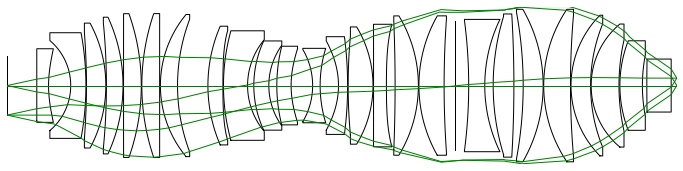

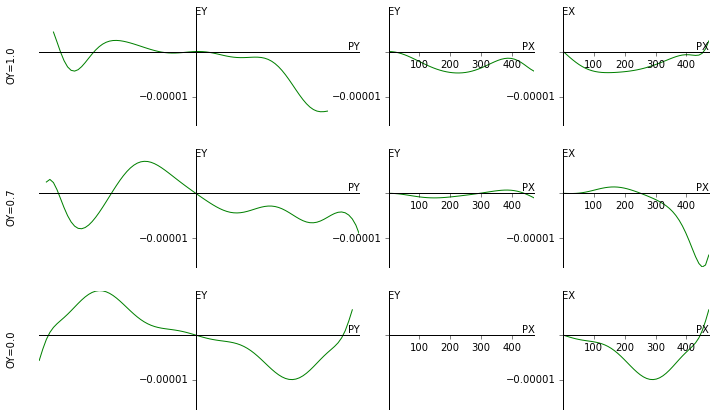

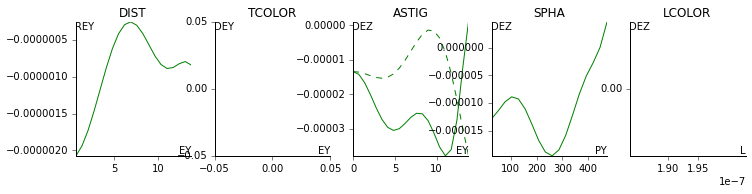

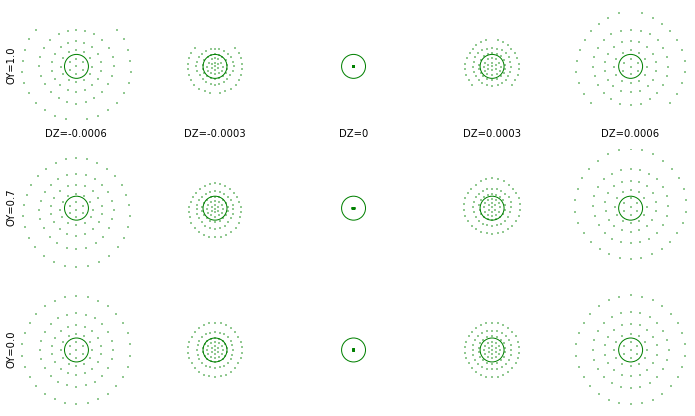

/home/rjordens/src/conda/envs/artiq/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


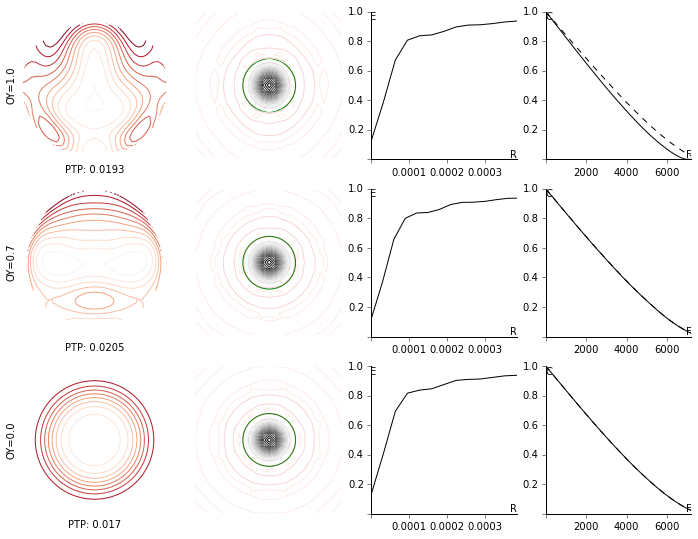

In [5]:
a = Analysis(s)

In [9]:
s.paraxial.number_of_points/1e15

15.425279333239747